# Cerebellar volumetry analysis with GLM: Comparing MAGeT ans SUIT results
## Data: 
    - 1. Cerebellar SUIT segmentation; 
         - SUIT: Left/right 1-X+Dentate+Interposed+Fastigial and Vermis
    - 2. Cerebellar MAGeTBrain [MAGeTBrain pipeline](https://github.com/CobraLab/documentation/wiki/MAGeTBrain#collecting-volumes)
        - MAGeT: Left/right 1-X+WhiteMatter(CM)

## Cohorts
- Current cohort: MNI ET/NC (38/32), PPMI/ADNI NC (116/308) QC applied.

## Tasks: GLM for 
- Compare lobule volumes： 

## Covariates
- Age, Sex, intracranial volume (eTIV, infratentorium, cerebellar volume), site.

In [1]:
#reading/merging/selecting data
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = Path("/codes/tab_data")
maget_dir = Path("/codes/preproc/maget/results")
cohorts_str = ['ADNI','ET','NC','PPMI']
et_maget_read = pd.read_csv(maget_dir/('ET_volumes.csv'), sep=',', header=0, index_col=0)
et_maget_read.index= [x[2:10] for x in et_maget_read.index]
nc_maget_read = pd.read_csv(maget_dir/('NC_volumes.csv'), sep=',', header=0, index_col=0)
nc_maget_read.index= [x[2:10] for x in nc_maget_read.index]
adni_maget_read = pd.read_csv(maget_dir/('ADNI_volumes.csv'), sep=',', header=0, index_col=0)
ppmi_maget_read = pd.read_csv(maget_dir/('PPMI_volumes.csv'), sep=',', header=0, index_col=0)
maget_df = pd.concat([et_maget_read,nc_maget_read,ppmi_maget_read,adni_maget_read])
maget_df.index= [x.replace('-','_') for x in maget_df.index]
maget_df.loc[:,'L_I_IV']  = maget_df.loc[:,'L_I_II']+maget_df.loc[:,'L_III']+maget_df.loc[:,'L_IV']
maget_df.loc[:,'R_I_IV'] = maget_df.loc[:,'R_I_II']+maget_df.loc[:,'R_III']+maget_df.loc[:,'R_IV']

#[maget_res=maget_res+{x: pd.read_csv(maget_dir/(x+"_volumes.csv"), sep=',', header=0, index_col=0)} for x in cohorts_str]
data_all_file  = data_dir/'all_Des-cere_preped_qcInfo.csv'
data_df    = pd.read_csv(data_all_file , sep=',', header=0, index_col=0);
data_df=data_df.join(maget_df, how='left')

# Applying QC 
qc_th=2
data_df=data_df[(data_df['freesurfer_score']>=qc_th)&(data_df['suit_score']>=qc_th)&(data_df['maget_score']>=qc_th)];

In [2]:
#GLM analysis and non-parametric comparison
SUIT_l_labels = ['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 
                 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 
                 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels = ['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII',
                 'Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X',
                 'Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels = ['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 
                 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];
MAGeT_l_labels = ['L_I_IV',  'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 
                 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X'];  # NO  'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'
MAGeT_r_labels = ['R_I_IV','R_V','R_VI','R_Crus_I','R_Crus_II',
                 'R_VIIB','R_VIIIA','R_VIIIB','R_IX','R_X'];  # NO  'Right_Dentate','Right_Interposed','Right_Fastigial'
end_lubule_list=len(MAGeT_l_labels)
#maget_df.columns=
#['L_I_II', 'L_III', 'L_IV', 'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X', 'L_CM', 
# 'R_I_II', 'R_III', 'R_IV', 'R_V', 'R_VI', 'R_Crus_I', 'R_Crus_II', 'R_VIIB', 'R_VIIIA', 'R_VIIIB', 'R_IX', 'R_X', 'R_CM']
# No vermis in MAGeT as well.

(64, 54)


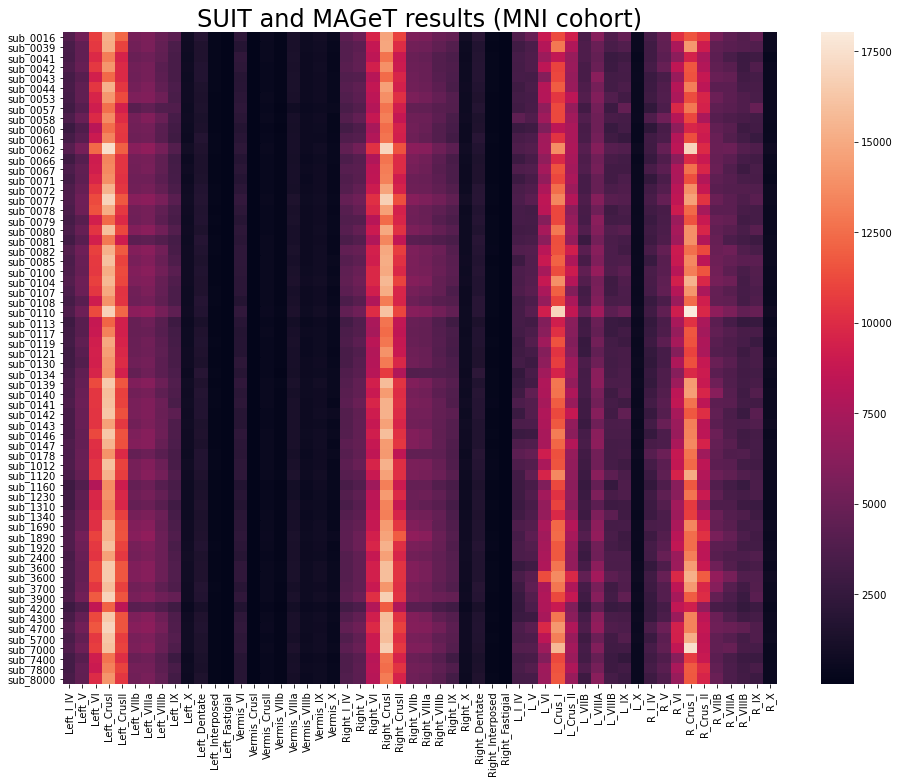

In [3]:
# Heatmap of results between SUIT and MAGeT measures (intercept)
vis_df=data_df.loc[(data_df['group']=='ET') | (data_df['group']=='NC')].copy()
vis_df=vis_df.loc[:,SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+MAGeT_l_labels+MAGeT_r_labels]
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(vis_df, ax=ax)
ax.set_title('SUIT and MAGeT results (MNI cohort)', fontsize=24)
print(vis_df.shape)

(365, 54)


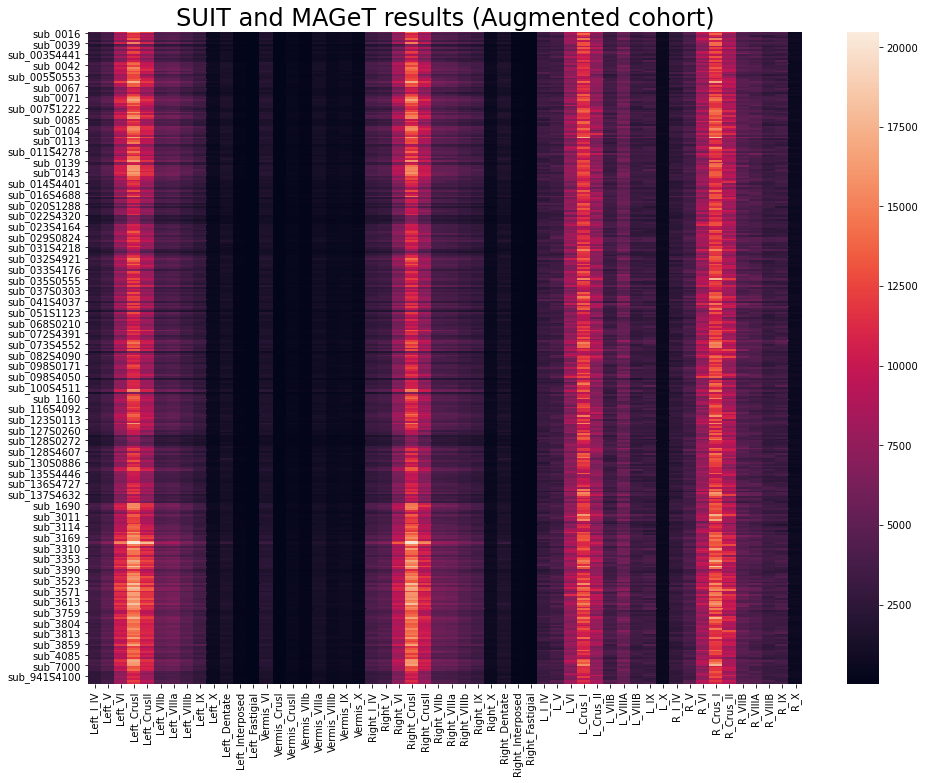

In [4]:
# Heatmap of results between SUIT and MAGeT measures (intercept)
vis_df=data_df.loc[:,SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+MAGeT_l_labels+MAGeT_r_labels].copy()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(vis_df, ax=ax)
ax.set_title('SUIT and MAGeT results (Augmented cohort)', fontsize=24)
print(vis_df.shape)

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.900347,0.776820,0.727401,0.803303,0.796219,0.793508,0.753667,0.520698,0.665550,...,0.484068,0.421128,0.536930,0.459404,0.426910,0.451270,0.729294,0.591719,0.381446,0.318826
Left_V,0.900347,1.000000,0.815019,0.757293,0.778080,0.727474,0.735916,0.739480,0.670197,0.653217,...,0.392650,0.512191,0.442543,0.420157,0.495222,0.470009,0.609699,0.517719,0.545566,0.424321
Left_VI,0.776820,0.815019,1.000000,0.850931,0.803665,0.782328,0.802041,0.842835,0.695237,0.656146,...,0.057083,0.318224,0.345530,0.526192,0.408031,0.538868,0.596983,0.436455,0.479928,0.419576
Left_CrusI,0.727401,0.757293,0.850931,1.000000,0.786153,0.805971,0.817036,0.788184,0.732952,0.719101,...,-0.002605,0.276952,0.377642,0.608530,0.428179,0.498363,0.561811,0.251270,0.540084,0.485663
Left_CrusII,0.803303,0.778080,0.803665,0.786153,1.000000,0.916539,0.872277,0.780884,0.644818,0.660539,...,0.148380,0.188743,0.356803,0.434528,0.656779,0.597557,0.589805,0.339588,0.524845,0.338573
Left_VIIb,0.796219,0.727474,0.782328,0.805971,0.916539,1.000000,0.980052,0.861680,0.553255,0.675417,...,0.148148,0.188677,0.303890,0.532799,0.543382,0.507971,0.648221,0.386459,0.382381,0.280547
Left_VIIIa,0.793508,0.735916,0.802041,0.817036,0.872277,0.980052,1.000000,0.912276,0.567031,0.667306,...,0.101355,0.224977,0.278595,0.517574,0.490652,0.467042,0.655323,0.422013,0.364187,0.275922
Left_VIIIb,0.753667,0.739480,0.842835,0.788184,0.780884,0.861680,0.912276,1.000000,0.625899,0.728178,...,0.073545,0.375020,0.280542,0.470108,0.338052,0.338504,0.567018,0.504378,0.444711,0.359841
Left_IX,0.520698,0.670197,0.695237,0.732952,0.644818,0.553255,0.567031,0.625899,1.000000,0.493615,...,-0.136301,0.287928,0.279345,0.375881,0.514061,0.384136,0.311953,0.189275,0.858017,0.511868
Left_X,0.665550,0.653217,0.656146,0.719101,0.660539,0.675417,0.667306,0.728178,0.493615,1.000000,...,0.267094,0.492735,0.358808,0.588383,0.187590,0.217288,0.483946,0.381203,0.484573,0.578022


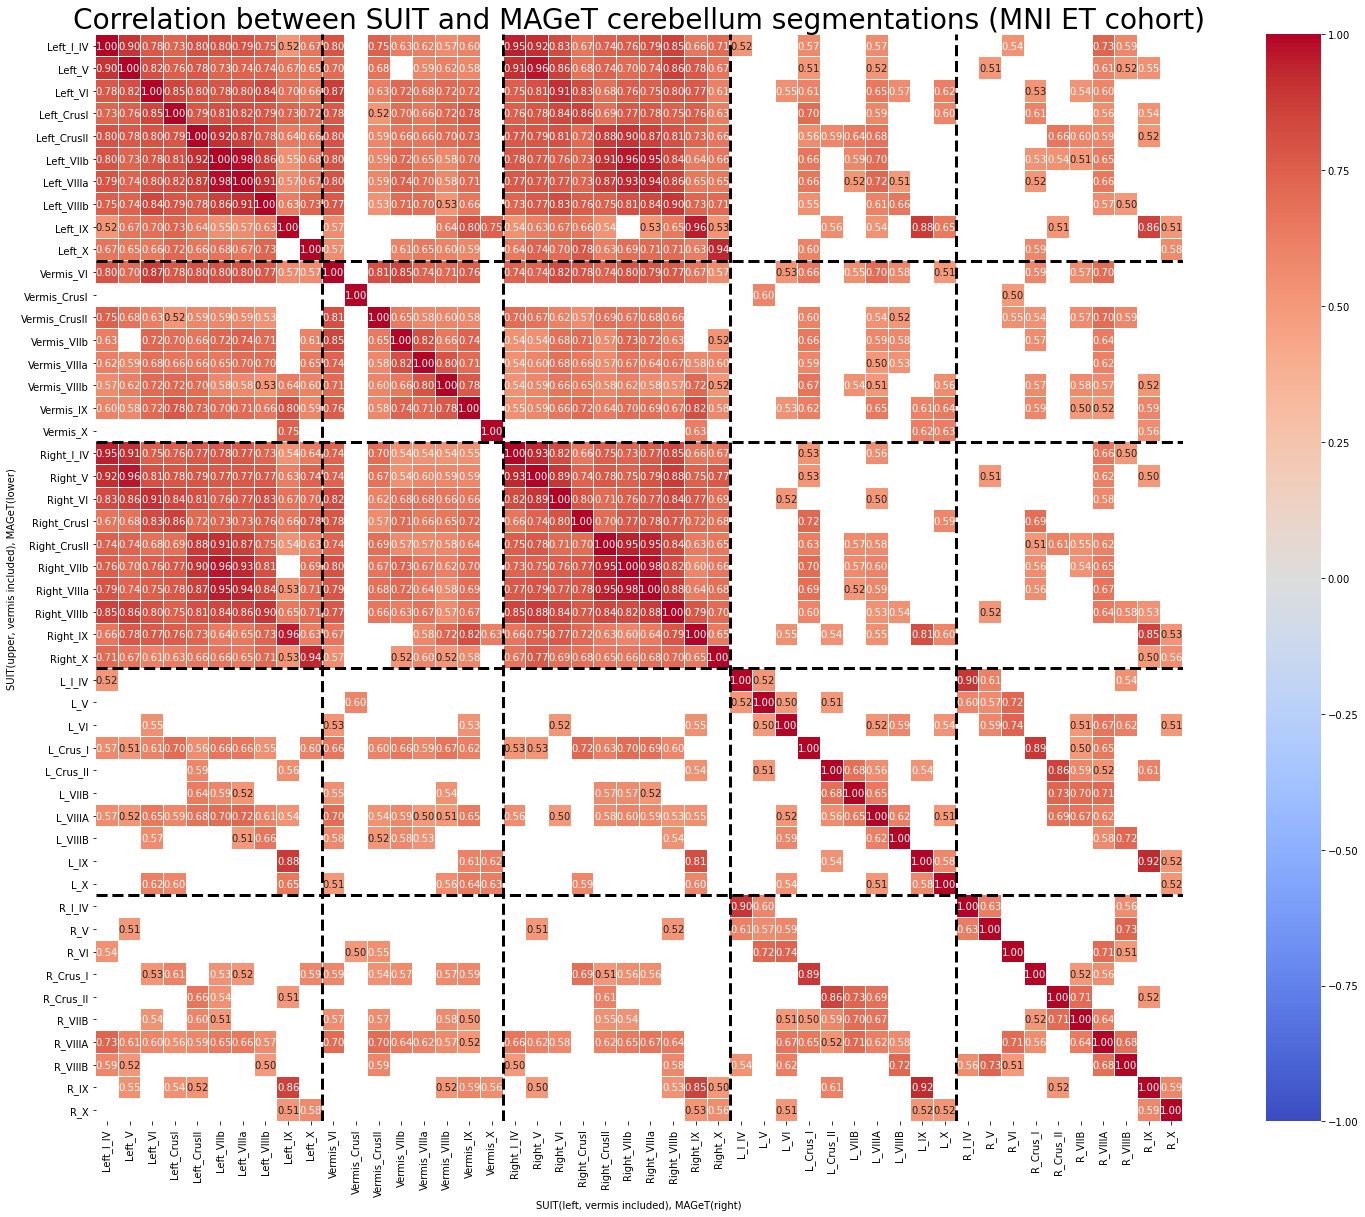

In [6]:
# Heatmap of correlation between SUIT and MAGeT measures (MNI ET)
C_MAP='coolwarm'; TH=0.5
vis_df=data_df.loc[(data_df['group']=='ET')].copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (MNI ET cohort)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("MNI_ET_SUIT-MAGeT_comp.jpg")
display(corr_)

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.938656,0.871797,0.755867,0.674295,0.702876,0.740968,0.732633,0.613555,0.623849,...,0.824315,0.770029,0.603407,0.719877,0.416948,0.381027,0.489386,0.484239,0.422807,0.285196
Left_V,0.938656,1.000000,0.934874,0.825786,0.697081,0.708494,0.739859,0.771489,0.617196,0.640977,...,0.754164,0.751871,0.631793,0.717816,0.277444,0.316552,0.434242,0.524963,0.391957,0.312561
Left_VI,0.871797,0.934874,1.000000,0.873790,0.701616,0.684200,0.709659,0.722768,0.694781,0.698730,...,0.592286,0.599584,0.628709,0.763738,0.275115,0.317795,0.506465,0.574060,0.434972,0.465627
Left_CrusI,0.755867,0.825786,0.873790,1.000000,0.816303,0.788394,0.780025,0.821275,0.763788,0.727861,...,0.470860,0.500388,0.504992,0.822617,0.381375,0.399832,0.518022,0.670946,0.566375,0.551971
Left_CrusII,0.674295,0.697081,0.701616,0.816303,1.000000,0.934066,0.909773,0.893535,0.718747,0.559442,...,0.440975,0.466441,0.447254,0.720667,0.707631,0.656053,0.727702,0.692635,0.485559,0.461724
Left_VIIb,0.702876,0.708494,0.684200,0.788394,0.934066,1.000000,0.970322,0.935365,0.649696,0.563601,...,0.555315,0.519055,0.301671,0.621158,0.614814,0.636982,0.621350,0.525241,0.314826,0.405107
Left_VIIIa,0.740968,0.739859,0.709659,0.780025,0.909773,0.970322,1.000000,0.945299,0.678568,0.607278,...,0.608209,0.587543,0.369466,0.661830,0.612892,0.608153,0.615800,0.548041,0.353823,0.428913
Left_VIIIb,0.732633,0.771489,0.722768,0.821275,0.893535,0.935365,0.945299,1.000000,0.724245,0.635576,...,0.625303,0.564847,0.326762,0.629911,0.591835,0.518859,0.511345,0.597907,0.386153,0.384336
Left_IX,0.613555,0.617196,0.694781,0.763788,0.718747,0.649696,0.678568,0.724245,1.000000,0.584222,...,0.382932,0.362386,0.552923,0.811187,0.578319,0.610369,0.596591,0.678681,0.810463,0.488343
Left_X,0.623849,0.640977,0.698730,0.727861,0.559442,0.563601,0.607278,0.635576,0.584222,1.000000,...,0.473822,0.501514,0.400177,0.589063,0.366520,0.138259,0.243707,0.424585,0.396644,0.555363


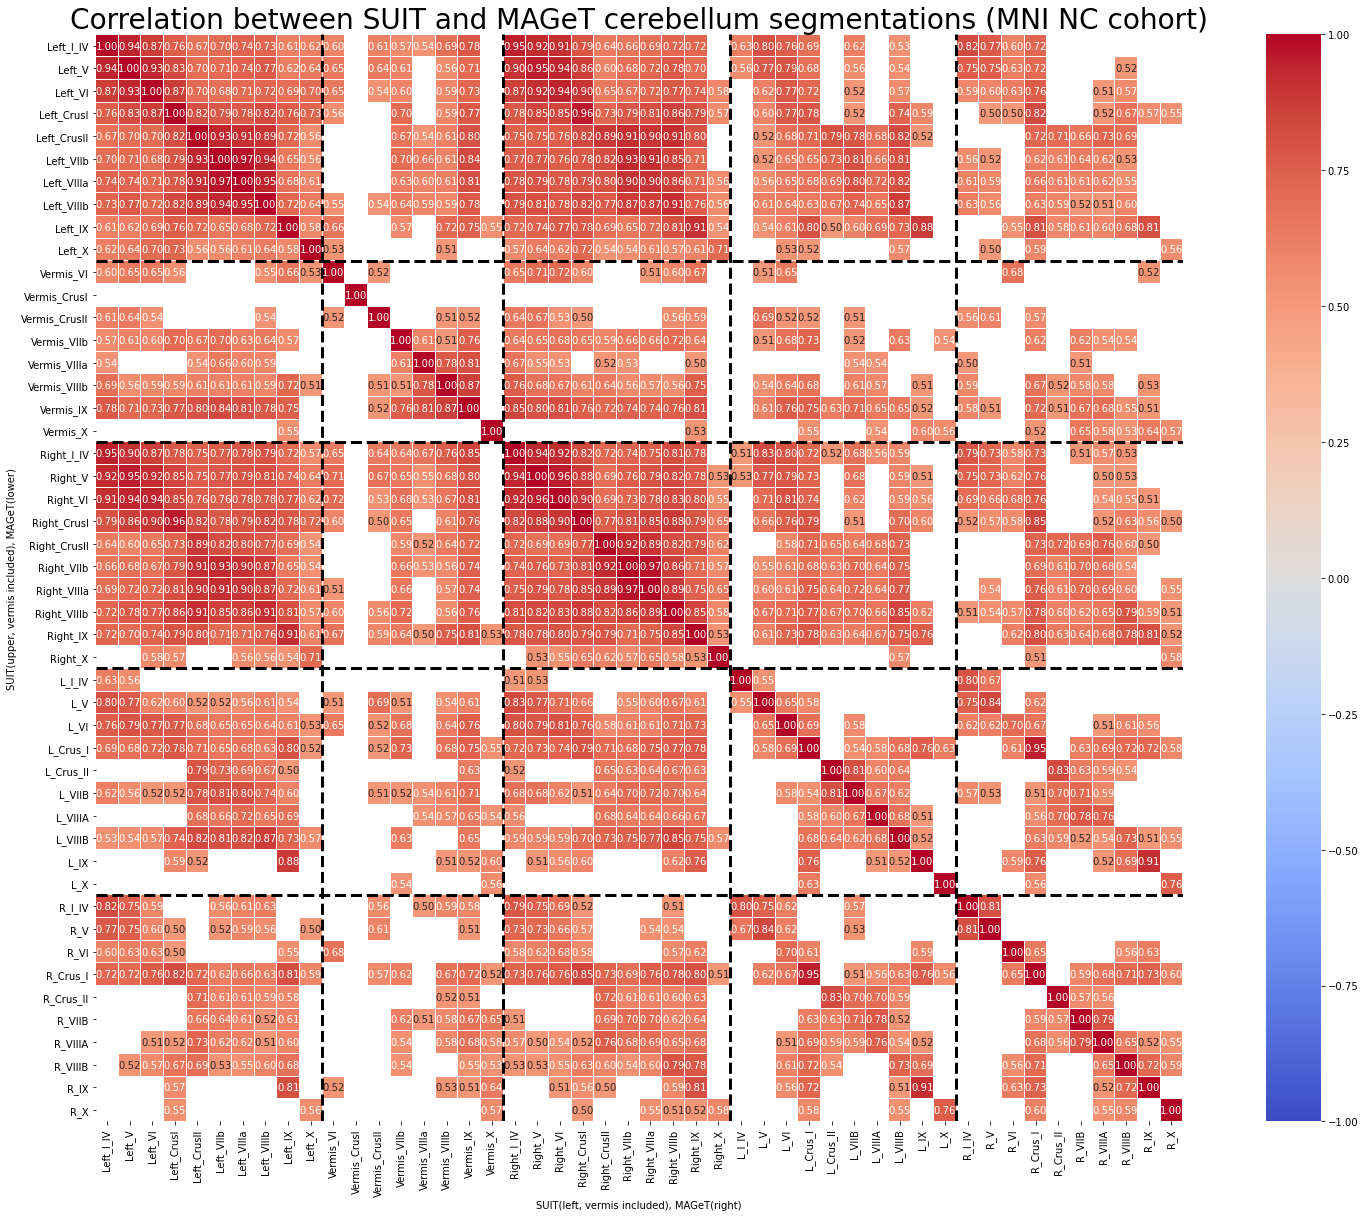

In [7]:
# Heatmap of correlation between SUIT and MAGeT measures (MNI NC)
C_MAP='coolwarm'; TH=0.5
vis_df=data_df.loc[data_df['group']=='NC'].copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (MNI NC cohort)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("MNI_NC_SUIT-MAGeT_comp.jpg")
display(corr_)

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.979979,0.972055,0.949447,0.947987,0.952287,0.954276,0.962278,0.933845,0.926980,...,0.493477,0.477828,0.353482,0.430702,0.467589,0.369611,0.376286,0.452442,0.433750,0.258517
Left_V,0.979979,1.000000,0.986284,0.955548,0.954113,0.956028,0.956295,0.963300,0.936718,0.936126,...,0.441162,0.488514,0.360196,0.422653,0.461747,0.367575,0.351704,0.449837,0.425896,0.266417
Left_VI,0.972055,0.986284,1.000000,0.965526,0.950159,0.955874,0.956215,0.963032,0.935186,0.937597,...,0.416124,0.437089,0.366242,0.424515,0.442615,0.363496,0.333548,0.430748,0.416094,0.255558
Left_CrusI,0.949447,0.955548,0.965526,1.000000,0.943170,0.949013,0.951537,0.952288,0.926968,0.936245,...,0.378801,0.407143,0.348380,0.508072,0.417292,0.337928,0.332212,0.419056,0.415595,0.249818
Left_CrusII,0.947987,0.954113,0.950159,0.943170,1.000000,0.989291,0.982671,0.966825,0.929044,0.937441,...,0.386199,0.416794,0.326206,0.404977,0.541607,0.445793,0.404454,0.439688,0.438226,0.258808
Left_VIIb,0.952287,0.956028,0.955874,0.949013,0.989291,1.000000,0.994863,0.976997,0.928661,0.945319,...,0.403634,0.421689,0.341762,0.402997,0.530326,0.451183,0.402333,0.441791,0.437616,0.250177
Left_VIIIa,0.954276,0.956295,0.956215,0.951537,0.982671,0.994863,1.000000,0.983432,0.935038,0.946074,...,0.408299,0.428322,0.336007,0.399729,0.520071,0.428110,0.400470,0.442589,0.438653,0.247828
Left_VIIIb,0.962278,0.963300,0.963032,0.952288,0.966825,0.976997,0.983432,1.000000,0.958822,0.948835,...,0.435163,0.459317,0.330218,0.410926,0.493490,0.401480,0.389094,0.490520,0.490732,0.246714
Left_IX,0.933845,0.936718,0.935186,0.926968,0.929044,0.928661,0.935038,0.958822,1.000000,0.925195,...,0.412344,0.447950,0.305756,0.422825,0.471204,0.352552,0.362575,0.488405,0.591604,0.254553
Left_X,0.926980,0.936126,0.937597,0.936245,0.937441,0.945319,0.946074,0.948835,0.925195,1.000000,...,0.388407,0.408023,0.323441,0.410949,0.456666,0.357209,0.324693,0.396786,0.435117,0.277342


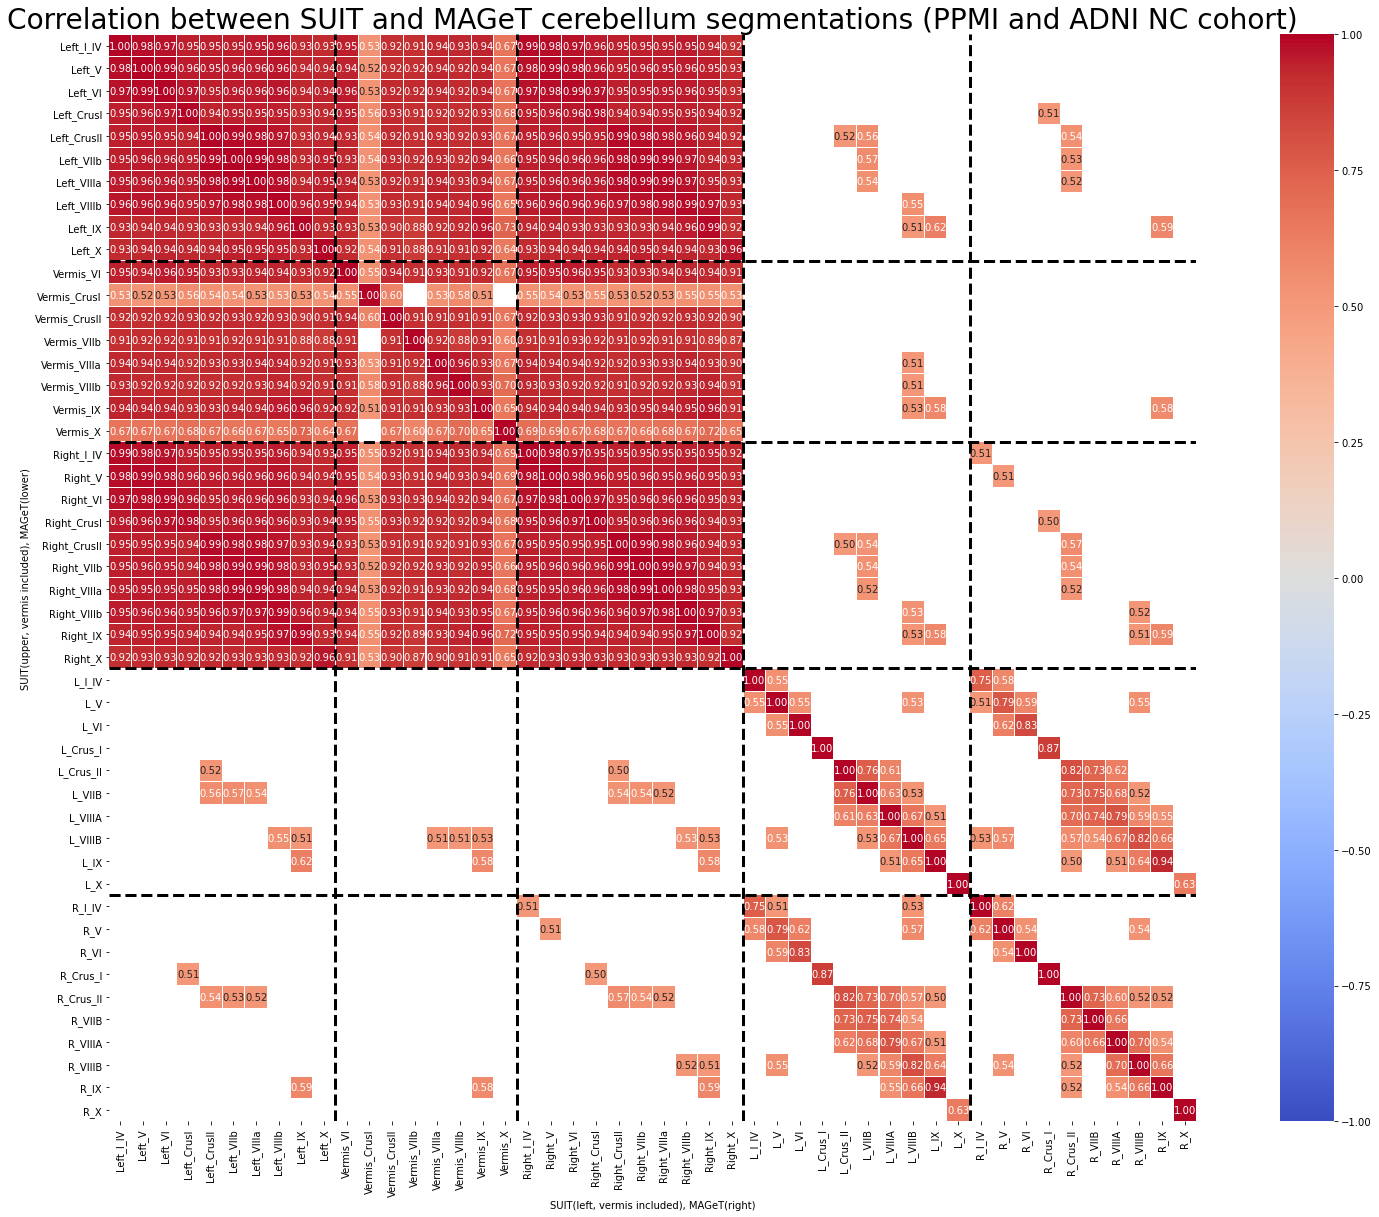

In [12]:
# Heatmap of correlation between SUIT and MAGeT measures (Augmented NC)
C_MAP='coolwarm'; TH=0.5
vis_df=data_df.loc[(data_df['group']=='ADNI') | (data_df['group']=='PPMI')].copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (PPMI and ADNI NC cohort)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("PPMI_ADNI_SUIT-MAGeT_comp.jpg")
display(corr_)

In [10]:
# GLM analysis for MNI cohort
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
import statsmodels.stats as sts
from utils_et_biomarker.utils import glm_test, rep_model

alpha_=0.05

tmp_df=data_df.loc[(data_df['group']=='ET') | (data_df['group']=='NC')].copy()
tar_list_suit = ['Left_CrusI', 'Left_CrusII', 'Right_CrusI','Right_CrusII']
tar_list_maget = ['L_Crus_I', 'L_Crus_II', 'R_Crus_I', 'R_Crus_II']

# Using eTIV as covariate before QC
covariate_model_str  = '~age+C(sex, Treatment(reference="F") )+eTIV+C(group, Treatment(reference="NC"))';
covariate_dict_suit  = glm_test(tmp_df, tar_list_suit, covariate_model_str);
covariate_dict_maget = glm_test(tmp_df, tar_list_maget, covariate_model_str);

#Reporting results
alpha_=0.05
print('SUIT @MNI Cohort (significant):')
rep_model(covariate_dict_suit, {'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})
print('MAGeT @Augmented Cohort (significant):')
rep_model(covariate_dict_maget, {'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})
print('SUIT @MNI Cohort (all):')
rep_model(covariate_dict_suit, {'name':'all'});
print('MAGeT @Augmented Cohort (all):')
rep_model(covariate_dict_maget, {'name':'all'});

SUIT @MNI Cohort (significant):
Only display significant results @ 0.05  for  C(group, Treatment(reference="NC"))[T.ET]  :



Left_CrusI~age+C(sex, Treatment(reference="F") )+eTIV+C(group, Treatment(reference="NC")) 

                               Results: Generalized linear model
Model:                        GLM                        AIC:                      1075.3272    
Link Function:                identity                   BIC:                      63511969.6409
Dependent Variable:           Left_CrusI                 Log-Likelihood:           -532.66      
Date:                         2021-11-26 08:29           LL-Null:                  -560.47      
No. Observations:             64                         Deviance:                 6.3512e+07   
Df Model:                     4                          Pearson chi2:             6.35e+07     
Df Residuals:                 59                         Scale:                    1.0765e+06   
Method:                       IRLS    

In [11]:
#GLM for the augmented group
tmp_df=data_df.copy()

tmp_df.loc[:,'is_mni'] =[1 if int(x=='ET' or x=='NC') else 0 for x in tmp_df['group']]
tmp_df.loc[:,'is_ppmi']=[int(x=='PPMI') for x in tmp_df['group']]
tmp_df.loc[:,'is_adni']=[int(x=='ADNI') for x in tmp_df['group']]
tmp_df.loc[:,'cohort']=tmp_df.loc[:,'group'].copy()
tmp_df.loc[:,'cohort'] = ['MNI' if x=='ET' or x=='NC' else x for x in tmp_df.loc[:,'cohort']]
tmp_df.loc[:,'group']  =[x if x=='ET' else 'NC' for x in tmp_df['group']]

tar_list_suit = ['Left_CrusI', 'Left_CrusII', 'Right_CrusI','Right_CrusII']
tar_list_maget = ['L_Crus_I', 'L_Crus_II', 'R_Crus_I', 'R_Crus_II']

covariate_model_all_str = '~age+C(sex, Treatment(reference="F"))+eTIV+C(cohort, Treatment(reference="MNI"))+C(group, Treatment(reference="NC"))';
# Test for SUIT results
covariate_dict_suit_all = glm_test(tmp_df, tar_list_suit, covariate_model_all_str);
# Test for MAGeT results:
covariate_dict_maget_all = glm_test(tmp_df, tar_list_maget, covariate_model_all_str);

#Reporting results
alpha_=0.05
print('SUIT @MNI Cohort (Significant):')
rep_model(covariate_dict_suit_all, {'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})
print('MAGeT @Augmented Cohort (Significant):')
rep_model(covariate_dict_maget_all, {'name':'significant','col_name':'C(group, Treatment(reference="NC"))[T.ET]','th':alpha_})

print('SUIT @MNI Cohort (all):')
rep_model(covariate_dict_suit_all, {'name':'all'});
print('MAGeT @Augmented Cohort (all):')
rep_model(covariate_dict_maget_all, {'name':'all'});

SUIT @MNI Cohort (Significant):
Only display significant results @ 0.05  for  C(group, Treatment(reference="NC"))[T.ET]  :

MAGeT @Augmented Cohort (Significant):
Only display significant results @ 0.05  for  C(group, Treatment(reference="NC"))[T.ET]  :

SUIT @MNI Cohort (all):
Display all results:



Left_CrusI~age+C(sex, Treatment(reference="F"))+eTIV+C(cohort, Treatment(reference="MNI"))+C(group, Treatment(reference="NC")) 

                                   Results: Generalized linear model
Model:                          GLM                          AIC:                        6436.2165     
Link Function:                  identity                     BIC:                        936005267.6293
Dependent Variable:             Left_CrusI                   Log-Likelihood:             -3211.1       
Date:                           2021-11-26 08:29             LL-Null:                    -3512.9       
No. Observations:               365                          Deviance:             

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.979999,0.972592,0.950883,0.945002,0.949240,0.952328,0.961195,0.932834,0.931366,...,0.508935,0.481226,0.336139,0.463396,0.465097,0.359292,0.364029,0.417935,0.437210,0.120354
Left_V,0.979999,1.000000,0.987606,0.959533,0.952338,0.953343,0.954625,0.962520,0.932861,0.941107,...,0.455929,0.497376,0.356676,0.461607,0.460299,0.362985,0.342096,0.427925,0.429980,0.143190
Left_VI,0.972592,0.987606,1.000000,0.967366,0.949137,0.953754,0.956125,0.962193,0.936033,0.942197,...,0.426187,0.447698,0.358383,0.461386,0.441205,0.351778,0.328771,0.413460,0.422315,0.126883
Left_CrusI,0.950883,0.959533,0.967366,1.000000,0.945100,0.949135,0.952004,0.953981,0.926157,0.938785,...,0.400066,0.411856,0.335127,0.536568,0.422524,0.334571,0.329142,0.414014,0.422129,0.128856
Left_CrusII,0.945002,0.952338,0.949137,0.945100,1.000000,0.989088,0.983939,0.965426,0.923468,0.938050,...,0.396760,0.408738,0.313914,0.426560,0.541140,0.444254,0.401215,0.421269,0.448901,0.139930
Left_VIIb,0.949240,0.953343,0.953754,0.949135,0.989088,1.000000,0.995472,0.976075,0.923370,0.944257,...,0.418409,0.411146,0.319651,0.423926,0.525702,0.450683,0.395452,0.412306,0.440681,0.117341
Left_VIIIa,0.952328,0.954625,0.956125,0.952004,0.983939,0.995472,1.000000,0.981915,0.932670,0.945232,...,0.427010,0.419643,0.321120,0.427685,0.519519,0.433764,0.400600,0.418873,0.450792,0.118584
Left_VIIIb,0.961195,0.962520,0.962193,0.953981,0.965426,0.976075,0.981915,1.000000,0.959659,0.947811,...,0.458450,0.455779,0.309738,0.444694,0.487460,0.396474,0.383218,0.463373,0.504532,0.103814
Left_IX,0.932834,0.932861,0.936033,0.926157,0.923468,0.923370,0.932670,0.959659,1.000000,0.926219,...,0.435243,0.452903,0.298167,0.465839,0.461573,0.348116,0.361048,0.474217,0.606728,0.131975
Left_X,0.931366,0.941107,0.942197,0.938785,0.938050,0.944257,0.945232,0.947811,0.926219,1.000000,...,0.400682,0.395976,0.312915,0.429321,0.444270,0.340326,0.303948,0.365556,0.431320,0.140382


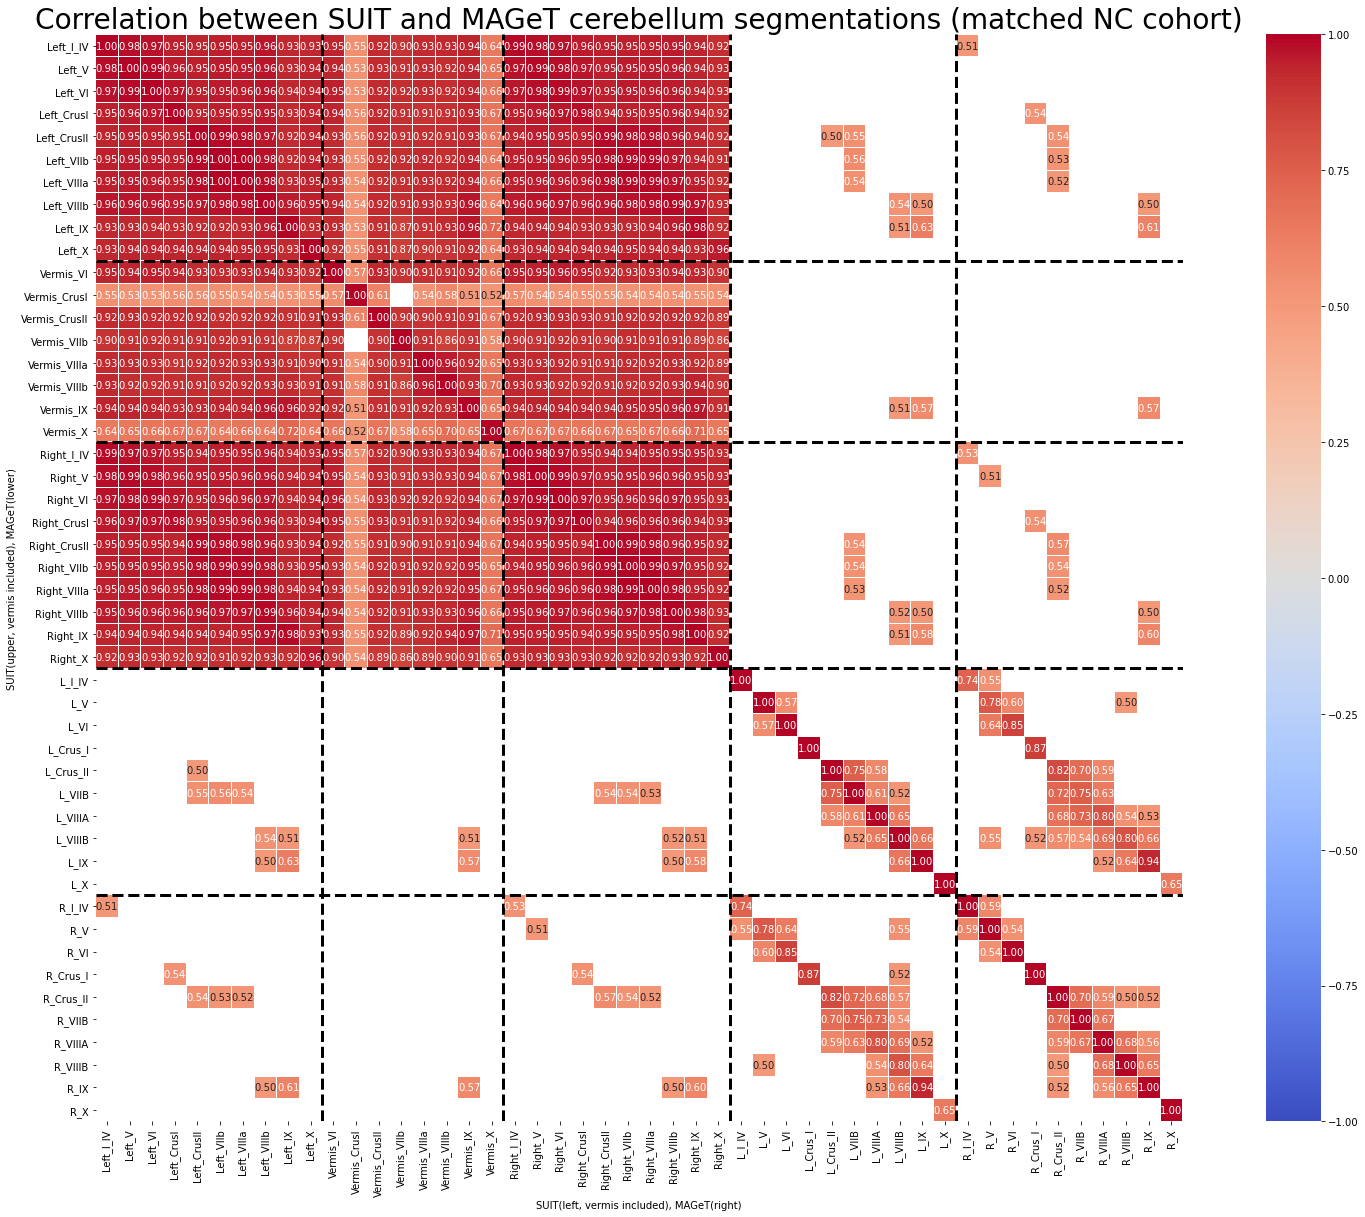

In [14]:
# results from the matched cohort
matched_data_file = data_dir/'matched_Des-cere_qced.csv'
matched_df = pd.read_csv(matched_data_file , sep=',', header=0, index_col=0);
matched_df=matched_df.join(maget_df, how='left')

# Heatmap of correlation between SUIT and MAGeT measures (Augmented NC)
C_MAP='coolwarm'; TH=0.5
vis_df=matched_df.loc[matched_df['group']=='NC'].copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels]

corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (matched NC cohort)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("matched_NC-MAGeT_comp.jpg")
display(corr_)